# AS07 Collocation for finding enthusiastic commentors

在文字探勘的第二單元我們介紹了Collocation來找出significant word pair。同樣的方法，我也可以把他改造來找出，在討論板上哪兩個人老是一起出現。你可以想像說在一個討論板中，某一主題一出來，某些人就會突然冒出來開始Comment。並且A下了Comment後，很快的B也會跟著下Comment。我們可以用Collocation的概念來找出這些總是一起出現的Commentors。但社會科學會把這樣的關係稱為Cooccurrence（共現）。

## Loading data

In [3]:
# colab
import pickle
!wget https://github.com/P4CSS/PSS/raw/master/data/pttpost_20210509_n178.dat -O pttpost_20210509_n178.dat
with open("pttpost_20210509_n178.dat", "rb") as fin:
    all_post = pickle.load(fin)

--2021-05-10 04:39:31--  https://github.com/P4CSS/PSS/raw/master/data/pttpost_20210509_n178.dat
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/P4CSS/PSS/master/data/pttpost_20210509_n178.dat [following]
--2021-05-10 04:39:31--  https://raw.githubusercontent.com/P4CSS/PSS/master/data/pttpost_20210509_n178.dat
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 992132 (969K) [application/octet-stream]
Saving to: ‘pttpost_20210509_n178.dat’

pttpost_20210509_n1 100%[===================>] 968.88K  --.-KB/s    in 0.06s   

2021-05-10 04:39:31 (15.9 MB/s) - ‘pttpost_20210509_n178.dat’ saved [992132/99213

In [1]:
# jupyterlab
import pickle
with open("pttpost_20210509_n178.dat", "rb") as fin:
    all_post = pickle.load(fin)

In [2]:
print(len(all_post))
print(all_post[1])
print("-"*80)
for comment in all_post[1]['comments']:
    print(comment)

178
{'author': 'cka (CK)', 'authorid': 'cka', 'nickname': 'CK', 'link': 'https://www.ptt.cc/bbs/Gossiping/M.1620484638.A.1EE.html', 'title': 'Re: [爆卦] 大阪肺炎死亡率超越印度啦！！', 'timestamp': 'Sat May  8 22:37:16 2021', 'content': '簡單講就是經濟跟死亡二選一的問題\n\n如果你全部的人都關在家不用上班\n經濟停止活動\n是年輕人會先餓死 因為存款比較少\n反而老人都有存款跟老人年金 會活下來\n疫情過日本會變成只有老人的國度\n\n反過來說\n繼續維持經濟活動\n年輕人可以上班賺錢活下去\n老人也沒叫你出門啊\n老人就乖乖在家  不乖乖在家的老人就...你自己加油\n我們不能犧牲年輕人保護你\n這樣疫情過後日本會變成有年輕人 跟少掉一部分不乖老人的國度\n怎麼看好像後者比較合理吧\n但又不能大聲說出來\n就目前的狀況看起來應該是這樣--', 'comments': [{'tag': '推 ', 'userid': 'eddisontw', 'content': ': 日本傳統文化裏面 老人等於不值錢垃圾 揹去山上丟掉的', 'timestamp': ' 05/08 22:39\n'}, {'tag': '→ ', 'userid': 'eddisontw', 'content': ': 沒有勞動產出 又消耗糧食 只有華人才在那邊敬老尊賢', 'timestamp': ' 05/08 22:40\n'}, {'tag': '→ ', 'userid': 'widec', 'content': ': 反觀台灣', 'timestamp': ' 05/08 22:41\n'}, {'tag': '→ ', 'userid': 'widec', 'content': ': 放手還能一次解決勞保年金各種問題呢', 'timestamp': ' 05/08 22:41\n'}, {'tag': '推 ', 'userid': 'jerrylin', 'content': ': 其實日本也是保經濟ㄟ  所以疫情才會壓不下', 'timestamp': ' 05/08 22:

## 1. Collocation as Cooccurrence
只要在同一則貼文的comments內，我們把任兩個commentor視為有co-comment，也就是Cooccurrence（共現）的關係。請計算出共現於本資料集中，頻率最高的前20對commentor（必須印出Collocation times作為參考）。
```
s72005ming 	 sl11pman 	 450
loham 	 sl11pman 	 450
sl11pman 	 s72005ming 	 450
sl11pman 	 loham 	 450
cwh0105 	 sl11pman 	 360
sl11pman 	 cwh0105 	 360
iampig951753 	 Runna 	 308
Runna 	 iampig951753 	 308
frank355571 	 sl11pman 	 270
sl11pman 	 frank355571 	 270
NICEGOGO 	 sl11pman 	 180
sl11pman 	 NICEGOGO 	 180
sl11pman 	 dawson0130 	 180
sl11pman 	 userlance 	 180
sl11pman 	 carryton 	 180
sl11pman 	 CheshireS 	 180
sl11pman 	 vic4580849 	 180
sl11pman 	 justeit 	 180
dawson0130 	 sl11pman 	 180
userlance 	 sl11pman 	 180
carryton 	 sl11pman 	 180
CheshireS 	 sl11pman 	 180
vic4580849 	 sl11pman 	 180
justeit 	 sl11pman 	 180
psl7634 	 gustavek 	 136
gustavek 	 psl7634 	 136
```

In [4]:
from collections import Counter
co_occurrence_counts = Counter()
# co_occurrence_counts_final = Counter()
# print(type(all_post))
# print(type(all_post[1]['comments']))

for i in range(len(all_post)):
    for j in range(len(all_post[i]['comments'])):
        for k in range(j+1, len(all_post[i]['comments'])):
            #i代表第幾則貼文
            #j,k代表第一、二個留言者
            co_1 = all_post[i]['comments'][j]['userid']
            co_2 = all_post[i]['comments'][k]['userid']
            if co_1 != co_2:
                co_occurrence_counts[(co_1, co_2)] += 1
                co_occurrence_counts[(co_2, co_1)] += 1
        
for (co_1, co_2) , counts in co_occurrence_counts.most_common(20):
    print("%s\t%s\t%d" % (co_1, co_2, counts))

s72005ming	sl11pman	450
sl11pman	s72005ming	450
loham	sl11pman	450
sl11pman	loham	450
cwh0105	sl11pman	360
sl11pman	cwh0105	360
iampig951753	Runna	308
Runna	iampig951753	308
frank355571	sl11pman	270
sl11pman	frank355571	270
NICEGOGO	sl11pman	180
sl11pman	NICEGOGO	180
sl11pman	dawson0130	180
dawson0130	sl11pman	180
sl11pman	userlance	180
userlance	sl11pman	180
sl11pman	carryton	180
carryton	sl11pman	180
sl11pman	CheshireS	180
CheshireS	sl11pman	180
sl11pman	vic4580849	180
vic4580849	sl11pman	180
sl11pman	justeit	180
justeit	sl11pman	180
psl7634	gustavek	136
gustavek	psl7634	136


## 2. Using MI
MI的計算方式主要是為了要標準化任一字的出現次數和任兩個字的出現次數的影響。請用MI的方式計算出哪兩個人特別常一起出現在同一則貼文的comments中。請用`most_common()`印出M前20大MI的Pairs（必須印出MI值作為參考）。

In [19]:
import math
mi_counts = Counter()
comm_counts = Counter() #用來計算單個commentor出現的次數

#總共有幾則comment pairs
comments_pairs_total = (sum(co_occurrence_counts.values()))

#先算每個commentor的出現次數
for i in range(len(all_post)):
    for j in range(len(all_post[i]['comments'])):
        co_1 = all_post[i]['comments'][j]['userid']
        comm_counts[co_1] += 1
                
# for (co_1, co_2), counts in co_occurrence_counts.most_common():
#     comm_counts[co_1] += counts / 2  #因為(co_2, co_1)時還會再算到一次
#     comm_counts[co_2] += counts / 2

#再算總共有幾則comments
comments_total = sum(comm_counts.values()) 
    
def mutual_information(mutual_prob, prob1, prob2):
    return math.log2(mutual_prob / (prob1 * prob2))

for (co_1, co_2), counts in co_occurrence_counts.most_common():
    prob_both = counts / comments_pairs_total
    prob_comm1 = comm_counts[co_1] / comments_total
    prob_comm2 = comm_counts[co_2] / comments_total
    if co_occurrence_counts[(co_1, co_2)] > 1:
        mi_counts[(co_1, co_2)] = mutual_information(prob_both, prob_comm1, prob_comm2)

for (co_1, co_2) , mi in mi_counts.most_common(20):
    print("%s\t%s\t%d\t%f" % (co_1, co_2, co_occurrence_counts[(co_1, co_2)], mi))


loham	sl11pman	450	5.515995
sl11pman	loham	450	5.515995
frank355571	sl11pman	270	5.515995
sl11pman	frank355571	270	5.515995
NICEGOGO	sl11pman	180	5.515995
sl11pman	NICEGOGO	180	5.515995
sl11pman	dawson0130	180	5.515995
dawson0130	sl11pman	180	5.515995
sl11pman	CheshireS	180	5.515995
CheshireS	sl11pman	180	5.515995
sl11pman	vic4580849	180	5.515995
vic4580849	sl11pman	180	5.515995
sl11pman	justeit	180	5.515995
justeit	sl11pman	180	5.515995
goddamnhuge	sl11pman	90	5.515995
sl11pman	goddamnhuge	90	5.515995
donyin	sl11pman	90	5.515995
sl11pman	donyin	90	5.515995
crazywiwi	sl11pman	90	5.515995
sl11pman	crazywiwi	90	5.515995


## 3. Cooccurrence with distance
就上述的資料集，我想定義的人與人的關係是「這兩個人老是一前一後出現」，所以我規劃僅計算前後5則以內的comments，也就是說，在同一貼文中，如果A是第一則comment，B是第六則comment，C是第七則，那我不列計A和C的關係，但列計A和B的關係。請用collocation with distance的觀念，計算任兩個comment間的平均距離，並用`most_comment()`列印出平均距離最短的前二十對commentors。

In [44]:
pair_mean_distance = Counter()
pair_distance = Counter()
pair_disin5_counts = Counter() 

for i in range(len(all_post)):
    for j in range(len(all_post[i]['comments'])):
        for k in range(j+1, len(all_post[i]['comments'])):
            #i代表第幾則貼文
            #j,k代表第一、二個留言者
            if k-j < 5:
                co_1 = all_post[i]['comments'][j]['userid']
                co_2 = all_post[i]['comments'][k]['userid']
                if co_1 != co_2:
                    pair_distance[(co_1, co_2)] += k-j
                    pair_disin5_counts[(co_1, co_2)] += 1

for (co_1, co_2), distance in pair_distance.most_common():
    if pair_disin5_counts[(co_1, co_2)] > 1:
        mean_dis = distance/pair_disin5_counts[(co_1, co_2)]
        pair_mean_distance[(co_1, co_2)] = mean_dis
        
for (co_1, co_2), mean_dis in pair_mean_distance.most_common()[-20:]:
    print("%s-%s\t%f\t%d" % (co_1, co_2, mean_dis, pair_disin5_counts[(co_1, co_2)]))




chen0625-Qinsect	1.500000	2
kenryu-bar1005	1.500000	2
bar1005-jetalpha	1.500000	2
typeklng-GARRETH	1.500000	2
GARRETH-fenix220	1.500000	2
KaiManSo-nikewang	1.500000	2
gwenwoo-s359999	1.500000	2
a410046-apatosaurus	1.500000	2
apatosaurus-t934140225	1.500000	2
username1-TsmcEE	1.500000	2
bigwun73-yheb88	1.500000	2
l88-sali921	1.500000	2
ab4daa-cecille	1.500000	2
kingstongyu-ntlutw	1.500000	2
ntlutw-kid1a2b3c4d	1.500000	2
kuan12065-lazarus1121	1.500000	2
show282-kuosambition	1.000000	2
Yonhao-jump693	1.000000	2
sellgd-smalltwo	1.000000	2
lazarus1121-tenka92417	1.000000	2


## 4. Drawing collocation network
以下已經提供給你部分不同網絡的視覺化方法和參數調整方法。如果你要看懂每個函式有可能要查閱Networkx的Document，不過這是為了push你去查閱document來理解這些程式碼。

列印出mi值或count值前500大、前1000大、前2000大（會有點吃力）的pairs of user，並觀察該圖型。基於co-commentor的網絡視覺化，你認為這群co-commenter有什麼特性？請多列印幾種版本，並將你的看法寫在以下的ANSWER後：
### ANSWER:
從圖像觀察可以得知，這些不同的co-commenter我們應該可以認定它們為彼此的同溫層，雖然可能彼此間的立場不一，但是它們都會關注同一議題，所以才會被我們認成co-commetor。

至於比較大群的co-commentor我們可以看到他們會有一至兩個中心，但這就有點不正常，因為如果說這群人中大家都互相留言的話，彼此間應該也會有線連著，而不是透過一個中心去做串接。對此我所做的推論大致有三種可能，一是中間這個帳號他是重度網友，不論在哪種文章底下都會留言，所以才會成為不同帳戶間連接的中心；二是這個帳號他可能自己發很多文章，且他時常會在自己文章底下回復來留言的人；三的話就是類似網軍的概念，以大群的中心帳戶為發起人，只有這個人留言時其他殭屍帳戶才會跟著留言，否則殭屍帳戶平常不留言。


In [32]:
%pip install networkx
%pip install pandas
%pip install scipy

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


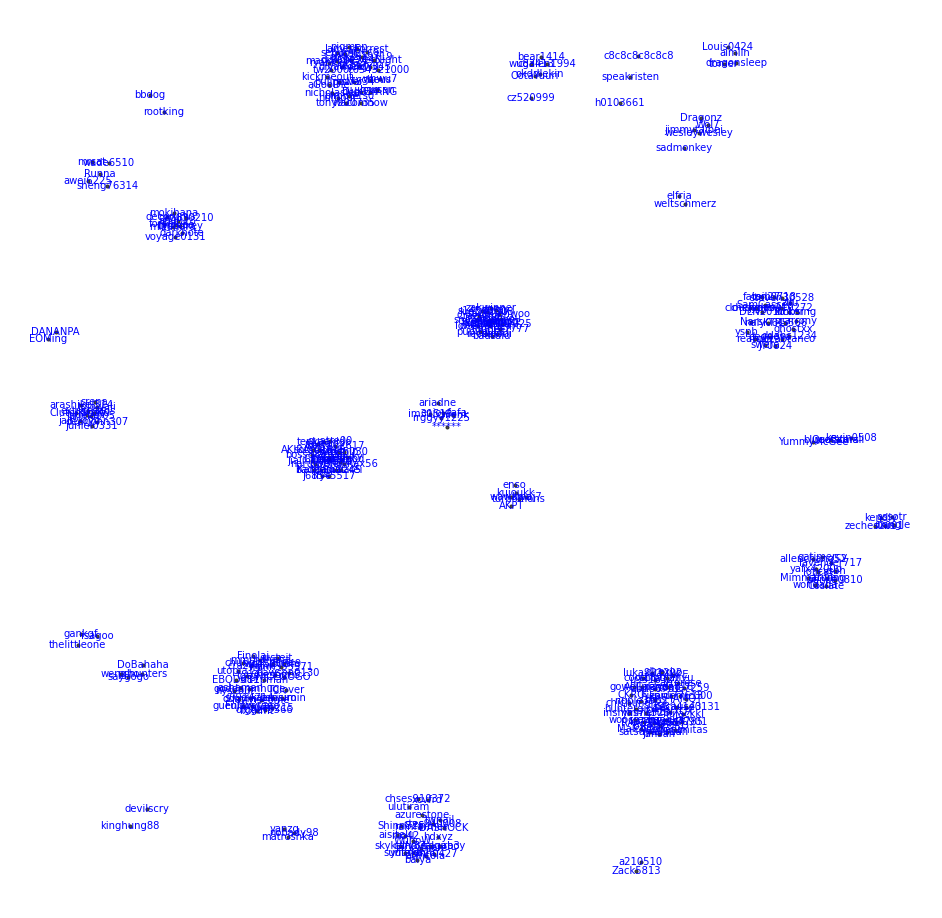

In [42]:
# %pip install networkx
import pandas as pd
import matplotlib.pyplot as plt
li = [(w1, w2, co_occurrence_counts[(w1, w2)], mi) for (w1, w2), mi in mi_counts.most_common()]
df = pd.DataFrame.from_records(li, columns =['w1', 'w2', 'count', 'mi'])

import networkx as nx
fig = plt.figure(1, figsize=(20, 20), dpi=60)

G = nx.from_pandas_edgelist(df[:1000],
                            source = 'w1',
                            target = 'w2',
                            edge_attr = 'count')
widths = nx.get_edge_attributes(G, 'mi')
nodelist = G.nodes()
# nx.draw_kamada_kawai(G,
#                     node_size = 5,
#                     edge_color = "#8833FF",
#                     with_labels = True)
pos = nx.spring_layout(G)
# nx.draw_spring(G,
#                node_size = 5,
#                edge_color = "#8833FF",
#                font_size = 16,
#                with_labels = True)
nx.draw_networkx_nodes(G,pos,
                       nodelist=nodelist,
                       node_size=15,
                       node_color='black',
                       alpha=0.7)
nx.draw_networkx_edges(G,pos,
                       edgelist = widths.keys(),
                       width=list([w/2 for w in widths.values()]),
                       edge_color='black',
                       alpha=0.2)
nx.draw_networkx_labels(G, pos=pos,
                        labels=dict(zip(nodelist,nodelist)),
                        font_color='blue')
plt.box(False)
plt.show()

## 也可使用pyvis.network畫畫看

In [35]:
# %pip install pyvis 
from pyvis.network import Network
net = Network('1024px', '2048px', notebook=True)
net.from_nx(G)
net.show("test.html")

## 4. Thinking
這樣的做法是否有助於察覺特定網軍的協同合作？

### ANSWER

就我認為應該是可以判斷的，呈上題我提到的三種可能性，主要我們可以重點關注一下中心帳戶留言的文章議題，畢竟也不能排除單純只是中心帳戶太活躍於網路上造成的現象，但是若我們可以看到中心帳戶留言的文章或內容很有待風向的傾向，或是其它殭屍帳戶(大群的周邊帳戶)真的就只有在中心帳戶留言時才會留言的話，就基本能斷定他們這一坨帳戶應為網軍了

另外我們也可以透過抓說要前幾大的mi值去作圖，如果單純是中心帳戶在網路上太過活躍的話，那當我們抓入的mi值比數越來越多，應該要能看到這種一大群的帳戶間有彼此的聯繫，且涵蓋的帳戶數量會越來越多。但反之若沒有這現象那就八成是網軍所為。